### **Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
heart_disease_data = pd.read_csv('heart_disease_data.csv')

In [3]:
# Printing first 5 rows of the dataset
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Printing last 5 rows of the dataset
heart_disease_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# Printing the number of rows and columns in the dataset
heart_disease_data.shape

(303, 14)

In [6]:
# Getting some info about the dataset
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Checking for missing values
heart_disease_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# Statistical measures about the dataset
heart_disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Checking the distribution of target variable
heart_disease_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

### **Splitting the Features and Targets**

In [10]:
X = heart_disease_data.drop(columns='target', axis=1)
Y = heart_disease_data['target']

In [11]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [12]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [14]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


### **Model training**

In [15]:
model = LogisticRegression()

In [16]:
# Training the Logistic Regression model with training data
model.fit(X_train, Y_train)

/Users/thanhhhtt/repos/ML/Logistic-Regression-Heart-Disease-Prediction/venv/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### **Model evaluation**

In [17]:
# Calculating accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [18]:
print('Accuracy on training data: ', training_data_accuracy)

Accuracy on training data:  0.8512396694214877


In [19]:
# Calculating accuracy score on testing data
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [20]:
print('Accuracy on testing data: ', testing_data_accuracy)

Accuracy on testing data:  0.819672131147541


### **Confussion matrix**

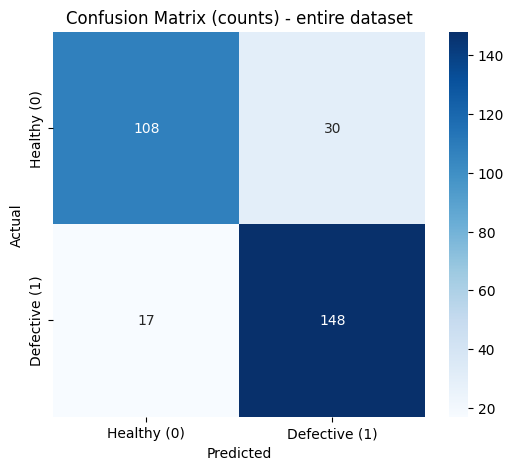


Classification metrics on entire dataset:
Accuracy : 0.8449
Precision: 0.8315
Recall   : 0.8970
F1-score : 0.8630


,Metric,Value
0,Accuracy,0.844884
1,Precision,0.831461
2,Recall,0.896970
3,F1-score,0.862974


In [21]:
# Confusion matrix diagram (heatmap) and classification metrics on the entire dataset
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Predict on the full dataset (X, Y defined earlier)
y_pred_all = model.predict(X)
# Compute confusion matrix: rows = actual, cols = predicted
cm = confusion_matrix(Y, y_pred_all)
labels = ['Healthy (0)', 'Defective (1)']
# Plot heatmap (counts)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (counts) - entire dataset')
plt.show()

# Compute metrics
accuracy_all = accuracy_score(Y, y_pred_all)
precision_all = precision_score(Y, y_pred_all, zero_division=0)
recall_all = recall_score(Y, y_pred_all, zero_division=0)
f1_all = f1_score(Y, y_pred_all, zero_division=0)

print('\nClassification metrics on entire dataset:')
print(f'Accuracy : {accuracy_all:.4f}')
print(f'Precision: {precision_all:.4f}')
print(f'Recall   : {recall_all:.4f}')
print(f'F1-score : {f1_all:.4f}')

# Also show counts in a tidy DataFrame
metrics_df = pd.DataFrame([['Accuracy', accuracy_all], ['Precision', precision_all], ['Recall', recall_all], ['F1-score', f1_all]], columns=['Metric','Value'])
display(metrics_df)

# Note: seaborn is required for the heatmap. If seaborn is not installed, run:
# python -m pip install seaborn

### **Data collecting and processing**

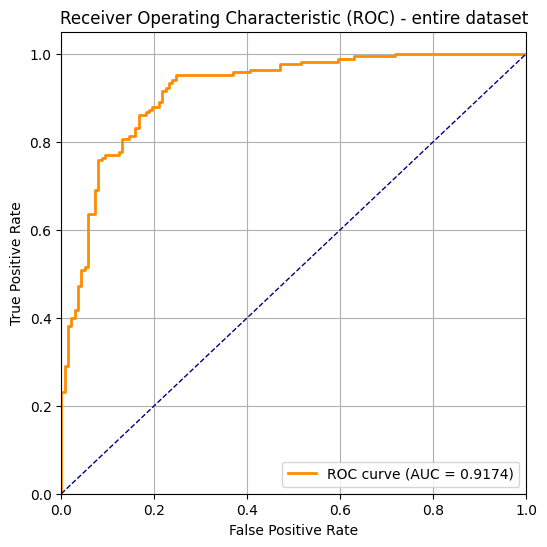

ROC AUC (entire dataset): 0.9174


In [22]:
# ROC curve and AUC for the entire dataset
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
# Use predict_proba if available, otherwise decision_function
if hasattr(model, 'predict_proba'):
    y_scores = model.predict_proba(X)[:, 1]
else:
    # Some estimators (e.g., SVM without probability=True) use decision_function
    y_scores = model.decision_function(X)

fpr, tpr, thresholds = roc_curve(Y, y_scores)
roc_auc = roc_auc_score(Y, y_scores)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - entire dataset')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f'ROC AUC (entire dataset): {roc_auc:.4f}')

# Tip: for an unbiased estimate, compute ROC/AUC on a held-out test set (X_test, Y_test) or via cross-validation.

### **Building predictive system**

In [23]:
# List of feature names corresponding to the input data
list_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Input data for one individual (13 features)
input_data = (62, 0, 0, 140, 268, 0, 0, 160, 0, 3.6, 0, 2, 2)

# Create a DataFrame using the input data and feature names
input_df = pd.DataFrame([input_data], columns=list_features)

prediction = model.predict(input_df)

print(prediction)

if prediction[0] == 0:
    print('This Person does not have a Heart Disease')
else:
    print('This Person has Heart Disease')

[0]
This Person does not have a Heart Disease
